#**Redes Neuronales Convulocioanes**#

#Importar los Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importar librerias

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Subir los archivos

In [ ]:
test = "/content/drive/MyDrive/64x64_SIGNS/test_signs"
train = "/content/drive/MyDrive/64x64_SIGNS/train_signs"
val = "/content/drive/MyDrive/64x64_SIGNS/val_signs"
manos_test=[]
manos_train=[]
manos_val=[]
img_size=64
label = []
train_labels = []
label_test = []

In [ ]:
# Guardamos las imagenes de entrenamiento con su respectivo nombre
for img in os.listdir(train):
  img = cv2.imread(os.path.join(train,img))
  img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_RGB,(img_size,img_size))
  manos_train.append([img_resize])
  train_labels = os.listdir(train)

In [ ]:
# Guardamos las imagenes de prueba con su respectivo nombre
for img in os.listdir(test):
  img = cv2.imread(os.path.join(test,img))
  img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img_resize = cv2.resize(img_RGB,(img_size,img_size))
  manos_test.append([img_resize])
  label_test = os.listdir(test)

# Tratamiento de Datos

In [ ]:
manos_train = np.array(manos_train)
manos_train.shape

(864, 1, 64, 64, 3)

In [ ]:
manos_train = manos_train.reshape(864,64,64,3)
manos_train.shape


(864, 64, 64, 3)

In [ ]:
manos_test = np.array(manos_test)
manos_test = manos_test.reshape(120,64,64,3)
manos_test.shape

(120, 64, 64, 3)

In [ ]:
manos_test = manos_test/255
manos_train = manos_train/255 

In [ ]:
train_labels2 = []
for i in range(len(train_labels)):
  x = str((train_labels[i])[0])
  x = np.array(x).astype('uint8')
  train_labels2.append(x)

In [ ]:
train_labels2 = np.array(train_labels2)

In [ ]:
label_test2 = []
for i in range(len(label_test)):
  x = str((label_test[i])[0])
  x = np.array(x).astype('uint8')
  label_test2.append(x)

In [ ]:
label_test2 = np.array(label_test2)

# Prueba de los archivos

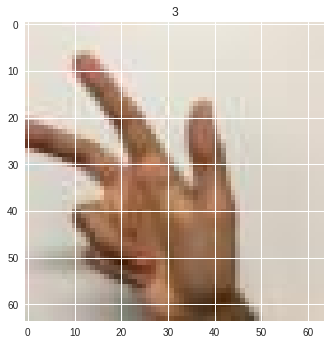

In [ ]:
indice = 100
plt.title(str(train_labels[indice])[0])
plt.imshow(manos_train[indice,:,:,:])
plt.show()

## Crear red neuronal

In [ ]:
model = models.Sequential([],name= 'LaPoderosa')

In [ ]:
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.summary()

Model: "LaPoderosa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.summary()

Model: "LaPoderosa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "LaPoderosa"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          3

In [ ]:
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(manos_train,train_labels2,epochs = 10)

Epoch 1/10
27/27 [==============================] - 7s 6ms/step - loss: 2.0146 - accuracy: 0.1376
Epoch 2/10
27/27 [==============================] - 0s 5ms/step - loss: 1.7930 - accuracy: 0.1945
Epoch 3/10
27/27 [==============================] - 0s 5ms/step - loss: 1.7587 - accuracy: 0.2592
Epoch 4/10
27/27 [==============================] - 0s 5ms/step - loss: 1.6233 - accuracy: 0.3321
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 1.3579 - accuracy: 0.4663
Epoch 6/10
27/27 [==============================] - 0s 5ms/step - loss: 1.1775 - accuracy: 0.5146
Epoch 7/10
27/27 [==============================] - 0s 5ms/step - loss: 0.8427 - accuracy: 0.7054
Epoch 8/10
27/27 [==============================] - 0s 5ms/step - loss: 0.7903 - accuracy: 0.7183
Epoch 9/10
27/27 [==============================] - 0s 5ms/step - loss: 0.6079 - accuracy: 0.7951
Epoch 10/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.8253


#Evaluar Exactitud#

In [ ]:
test_loss, test_acc = model.evaluate(manos_test,label_test2, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 0.5308 - accuracy: 0.8167

Test accuracy: 0.8166666626930237


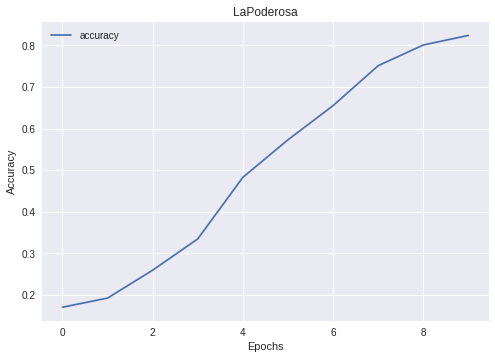

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.title('LaPoderosa')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("LaPoderosa.png",dpi=400)
plt.show()

In [ ]:
predicciones = model.predict(manos_test)

In [ ]:
predicciones.shape

(120, 10)

In [ ]:
xPrueba = manos_test

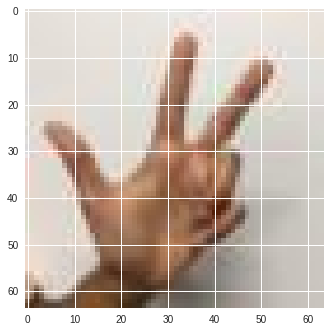

In [ ]:
plt.imshow(xPrueba[0,:,:],cmap='gray')

El numero es: 3


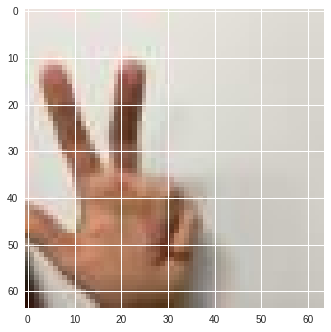

In [ ]:
import random
indice = random.randint(0,119)
ejemplo = xPrueba[indice,:,:]
pred_ejemplo = predicciones[indice]

plt.imshow(ejemplo,cmap='gray')
print('El numero es:',pred_ejemplo.argmax())

##RED NEURONAL 2.0


In [ ]:
model2 = models.Sequential([],name='SOYLEYENDA')

In [ ]:
model2.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',input_shape=(64,64,3),padding='same'))
model2.add(layers.MaxPool2D((2,2)))

In [ ]:
model2.add(layers.Flatten())

In [ ]:
model2.add(layers.Dense(32,activation='relu'))
model2.add(layers.Dense(10))

In [ ]:
model2.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "SOYLEYENDA"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4194336   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 4,198,250
Trainable params: 4,198,250
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(manos_train,train_labels2,epochs = 10)

Epoch 1/10
27/27 [==============================] - 1s 9ms/step - loss: 2.7505 - accuracy: 0.1772
Epoch 2/10
27/27 [==============================] - 0s 7ms/step - loss: 1.8506 - accuracy: 0.2196
Epoch 3/10
27/27 [==============================] - 0s 7ms/step - loss: 1.7391 - accuracy: 0.2316
Epoch 4/10
27/27 [==============================] - 0s 7ms/step - loss: 1.6287 - accuracy: 0.3214
Epoch 5/10
27/27 [==============================] - 0s 7ms/step - loss: 1.4562 - accuracy: 0.4497
Epoch 6/10
27/27 [==============================] - 0s 7ms/step - loss: 1.3016 - accuracy: 0.4683
Epoch 7/10
27/27 [==============================] - 0s 7ms/step - loss: 1.1545 - accuracy: 0.5541
Epoch 8/10
27/27 [==============================] - 0s 7ms/step - loss: 1.1098 - accuracy: 0.5998
Epoch 9/10
27/27 [==============================] - 0s 7ms/step - loss: 1.1600 - accuracy: 0.5643
Epoch 10/10
27/27 [==============================] - 0s 7ms/step - loss: 0.9853 - accuracy: 0.6297


##Evaluar Exactitud de los dos modelos:)

In [ ]:
test_loss, test_acc = model2.evaluate(manos_test,label_test2, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 1.1137 - accuracy: 0.5750

Test accuracy: 0.574999988079071


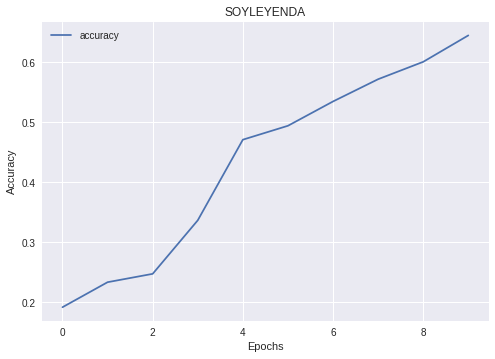

In [ ]:
plt.plot(history2.history['accuracy'],label='accuracy')
plt.title('SOYLEYENDA')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("SOYLEYENDA.png",dpi=300)
plt.show()

In [ ]:
predicciones2 = model2.predict(manos_test)

El numero con el modelo 1 es: 5
El numero con el modelo 2 es: 5


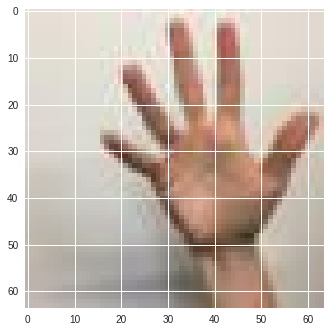

In [ ]:
import random
indice = random.randint(0,119)
ejemplo = xPrueba[indice,:,:]
pred_ejemplo = predicciones[indice]

plt.imshow(ejemplo,cmap='gray')
print('El numero con el modelo 1 es:',pred_ejemplo.argmax())

pred_ejemplo2 = predicciones2[indice]
print('El numero con el modelo 2 es:',pred_ejemplo2.argmax())

#Comparación LaPoderosa vs SOYLEYENDA#

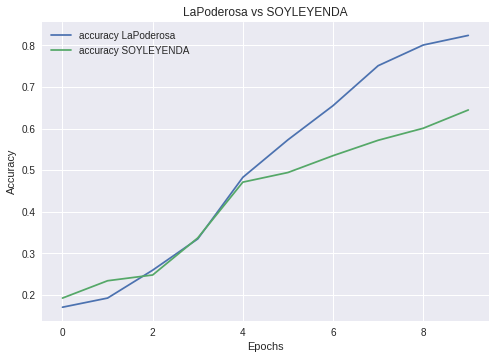

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy LaPoderosa')
plt.plot(history2.history['accuracy'],label='accuracy SOYLEYENDA')
plt.title('LaPoderosa vs SOYLEYENDA')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("versus.png")
plt.show()